In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

plt.rcParams.update({"font.size" : 15, "font.family" : "serif"})

In [269]:
data = pd.read_csv("data/InS_817.csv", skiprows=4)
data

,PeakDirection,20311
0,499.562169,30.904722
1,500.044372,28.674059
2,500.526574,26.650572
3,501.008777,26.849438
4,501.490980,26.895703
...,...,...
10366,5498.077074,12.438481
10367,5498.559276,12.482862
10368,5499.041479,12.429854
10369,5499.523682,11.992062


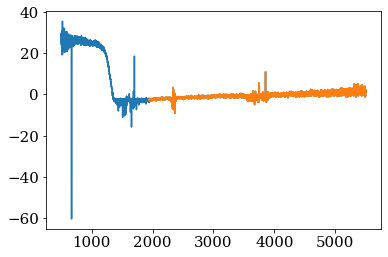

In [320]:
x, y = data["PeakDirection"], data["20311"]
plt.plot(x, y)
plt.plot(x[3000:], y[3000:])

y -= y[5000:].mean()

cut=2000
y /= y[-cut:].mean()


Text(0.5, 1.0, 'Спектр пропускания полупроводника InS817')

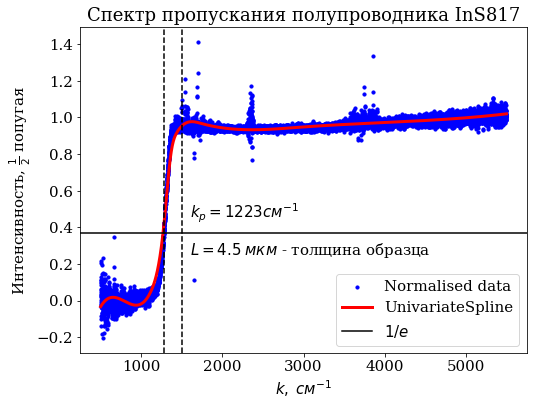

In [305]:
Uv = UnivariateSpline(x, y, s=11)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", s=10,label="Normalised data")
plt.plot(x, Uv(x), color="red", linewidth=3, label="UnivariateSpline")

plt.axvline(1280, color="black", linestyle="--")
plt.axhline(1/np.e, color="black", label="$1/e$")
plt.axvline(1500, color="black", linestyle="--")
plt.legend()


print()
plt.annotate(xy=(1600, 0.45), text="$k_p = {}$".format(round(x[1500]))+"$см^{-1}$")
plt.annotate(xy=(1600, 0.25), text="$L = {}$".format(round(1e4 * 0.5/x[1280], 1))+"$\;мкм$ - толщина образца")
plt.xlabel("$k,\; см^{-1}$")
plt.ylabel("Интенсивность, $\\frac{1}{2}$ попугая")
plt.title("Спектр пропускания полупроводника InS817")

In [274]:
def kp_toNe(k):
    m = 9.1 * 1e-31
    c = 3e8
    e = 1.6e-19
    e0 = 8.85e-12
    return m*e0*c/e**2 * k * 100

In [316]:
data = pd.read_csv("data/Ins_753.csv", skiprows=4)
data

,PeakDirection,20311
0,499.562169,38.528296
1,500.044372,38.384672
2,500.526574,38.090832
3,501.008777,39.375031
4,501.490980,40.139882
...,...,...
10366,5498.077074,27.553570
10367,5498.559276,27.794216
10368,5499.041479,27.905628
10369,5499.523682,27.188187


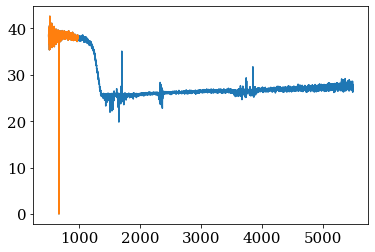

In [317]:
x, y = data["PeakDirection"], data["20311"]
plt.plot(x, y)
plt.plot(x[:1000], y[:1000])

y -= y[:1000].mean()

cut=2000
y /= y[-cut:].mean()


Text(0.5, 1.0, 'Спектр пропускания полупроводника InS817')

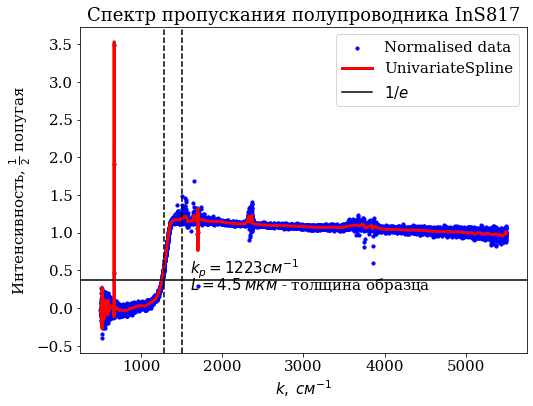

In [318]:
Uv = UnivariateSpline(x, y, s=11)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", s=10,label="Normalised data")
plt.plot(x, Uv(x), color="red", linewidth=3, label="UnivariateSpline")

plt.axvline(1280, color="black", linestyle="--")
plt.axhline(1/np.e, color="black", label="$1/e$")
plt.axvline(1500, color="black", linestyle="--")
plt.legend()


print()
plt.annotate(xy=(1600, 0.45), text="$k_p = {}$".format(round(x[1500]))+"$см^{-1}$")
plt.annotate(xy=(1600, 0.25), text="$L = {}$".format(round(1e4 * 0.5/x[1280], 1))+"$\;мкм$ - толщина образца")
plt.xlabel("$k,\; см^{-1}$")
plt.ylabel("Интенсивность, $\\frac{1}{2}$ попугая")
plt.title("Спектр пропускания полупроводника InS817")